[ 3.29867229  3.5499997   3.5918876   7.19424718  7.27802298  7.46651854
 11.08982207 11.19454182 11.2887896  14.97492498 15.01681288 14.95398103
 18.61917246 18.75530814 18.79719604 22.5356913  22.55663525 22.5356913 ]


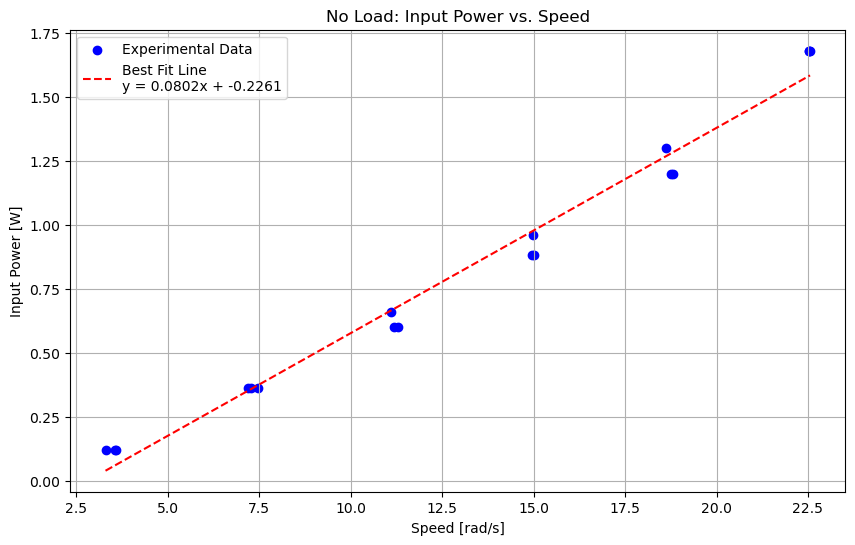

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
# 1. Extract data from Table 1
# Speed (rpm)
speed_rpm = [
    31.5, 33.9, 34.3,    # 2V
    68.7, 69.5, 71.3,    # 4V
    105.9, 106.9, 107.8, # 6V
    143.0, 143.4, 142.8, # 8V
    177.8 ,179.1, 179.5,215.2,215.4,215.2               # 10V (only one data point)
]
speed_rpm1 = np.array([
    31.5, 33.9, 34.3,    # 2V
    68.7, 69.5, 71.3,    # 4V
    105.9, 106.9, 107.8, # 6V
    143.0, 143.4, 142.8, # 8V
    177.8 ,179.1, 179.5,215.2,215.4,215.2
])
speed_rad=speed_rpm1/30*pi
print(speed_rad)
# Input Power (W)
input_power_w = [
    0.12, 0.12, 0.12, # 2V
    0.36, 0.36, 0.36, # 4V
    0.66, 0.6, 0.6,   # 6V
    0.96, 0.88, 0.88, # 8V
    1.3,1.2,1.2,1.68,1.68,1.68               # 10V
]

# 2. Convert speed units from rpm to rad/s
# Conversion formula: 1 rpm = (2 * pi) / 60 rad/s
speed_rad_s = np.array(speed_rpm) * (2 * np.pi / 60)

# 3. Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(speed_rad_s, input_power_w, label='Experimental Data', color='blue')

# 4. Calculate and plot the best-fit line (linear)
# np.polyfit(x, y, 1) returns the coefficients [m, b] for a 1st-degree polynomial (y = mx + b)
coefficients = np.polyfit(speed_rad_s, input_power_w, 1)
m = coefficients[0]
b = coefficients[1]

# Create x and y values for the fit line
x_fit = np.linspace(min(speed_rad_s), max(speed_rad_s), 100)
y_fit = m * x_fit + b

plt.plot(x_fit, y_fit, 'r--', label=f'Best Fit Line\ny = {m:.4f}x + {b:.4f}')

# 5. Set up plot labels and title
plt.xlabel('Speed [rad/s]')
plt.ylabel('Input Power [W]')
plt.title('No Load: Input Power vs. Speed')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# -----------------------------------------------------------
# !! 替换为你的数据框变量名 !!
# 假设你的原始数据存储在这个变量中。
# 例如: df_raw_data = pd.read_excel('你的原始文件路径.xlsx')
# -----------------------------------------------------------
# !! 请您上传 v9.xlsx 和 v12.xlsx !!
try:
    file_path_9V = 'v9.xlsx'
    df_9V = pd.read_excel(file_path_9V)

    file_path_12V = 'v12.xlsx'
    df_12V = pd.read_excel(file_path_12V)

# --------------------------------------------------------
    # 假设你已经用 pandas 读取了原始数据，这里用一个示例 DataFrame 代替
    # 实际使用时，请确保 df_raw_data 是你的完整原始数据 DataFrame
    # !! 注意：当前代码只分析 9V 的数据。如需12V，请将下一行改为 df_12V
    df_raw_data = df_12V

    # **重要步骤：计算 Output Power**
    # 实验手册要求我们自己计算功率 P = T * w
    # 1. 将 RPM 转换为 rad/s (w)
    df_raw_data['Speed_rad_s'] = df_raw_data['RPM'] * (2 * np.pi) / 60
    # 2. 计算 Output Power (W) = Torque (N-m) * Speed (rad/s)
    # 根据你的数据表头截图，扭矩在 'Tracking Value' 列
    df_raw_data['Output Power'] = df_raw_data['Tracking Value'] * df_raw_data['Speed_rad_s']


except (NameError, FileNotFoundError):
    print("错误：请确保您已经上传了 'v9.xlsx' 和 'v12.xlsx' 文件。")
    if 'df_raw_data' not in locals():
      print("错误：无法加载真实数据，将退出。")
      exit()


# --- 使用 Plotly 生成双 Y 轴图表 ---

# 1. 创建 Plotly 图形对象
fig = go.Figure()

# 2. 添加 RPM 曲线 (左 Y 轴)
fig.add_trace(go.Scatter(
    x=df_raw_data['Sample Number'],
    y=df_raw_data['RPM'],
    name='RPM (Rotations per Minute)',
    yaxis='y1',
    mode='lines+markers'
))

# 3. 添加 Output Power 曲线 (右 Y 轴)
fig.add_trace(go.Scatter(
    x=df_raw_data['Sample Number'],
    y=df_raw_data['Output Power'],
    name='Output Power (W)',
    yaxis='y2',
    mode='lines+markers'
))

# 3.5. !! 新增：添加 Torque (Tracking Value) 曲线 (右 Y 轴) !!
fig.add_trace(go.Scatter(
    x=df_raw_data['Sample Number'],
    y=df_raw_data['Tracking Value'],
    name='Torque (N-m)',  # 假设单位是 N-m
    yaxis='y2',
    mode='lines+markers',
    line=dict(dash='dot') # 使用虚线以区分
))


# 4. !! 修改：配置布局和双 Y 轴 !!
fig.update_layout(
    title='Motor RPM, Output Power, and Torque (Interactive Plot)', # 修改了主标题
    xaxis_title='Sample Number',
    yaxis=dict(
        title='RPM',
        titlefont=dict(color="#1f77b4"),
        tickfont=dict(color="#1f77b4")
    ),
    yaxis2=dict(
        title='Output Power (W) & Torque (N-m)', # 修改了Y轴2的标题
        titlefont=dict(color="#000000"),  # 改为中性色
        tickfont=dict(color="#000000"),  # 改为中性色
        overlaying='y', # 覆盖在第一个 Y 轴上
        side='right'    # 放在右边
    ),
    hovermode="x unified", # 鼠标悬停时显示两个 Y 轴的数据
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01) # 调整图例位置
)

# 5. 显示图表
fig.show()
fig.write_json('motor_performance_plot.json')
print("图表已生成并保存为 'motor_performance_plot.json'")


# -----------------------------------------------------------
# !! 新增：计算指定段落的平均值 !!
# -----------------------------------------------------------

# !! 请告诉我您想分析的 'Sample Number' 范围
# !! (这里使用示例值，请您提供真实范围)
start_sample = 160  # 示例开始点 (例如: 50)
end_sample =200  # 示例结束点 (例如: 100)
# 9v
# 20-50
# 70-120
# 160-190
# 220-270


# 12v
# 20-80
# 94-114
# 125-150
# 160-200


print("\n" + "="*40)
print(f"开始计算 Sample Number {start_sample} 到 {end_sample} 范围内的平均值...")
print(f"(使用的数据源: {'v9.xlsx' if df_raw_data is df_9V else 'v12.xlsx'})")

# 1. 根据 'Sample Number' 筛选数据段
segment_df = df_raw_data[
    (df_raw_data['Sample Number'] >= start_sample) &
    (df_raw_data['Sample Number'] <= end_sample)
]

# 2. 检查是否找到了数据
if not segment_df.empty:
    # 3. 计算这三个量的平均值
    avg_rpm = segment_df['RPM'].mean()
    avg_rpm_rad_s = avg_rpm * (2 * np.pi) / 60
    avg_torque = segment_df['Tracking Value'].mean()
    avg_power = segment_df['Output Power'].mean()

    print("\n" + "="*40)
    print(f"数据段 (Sample Number {start_sample} - {end_sample}) 的平均值:")
    print(f"  - 平均 RPM:                 {avg_rpm}")
    print(f"  - 平均 RPM:                 {avg_rpm_rad_s} rad/s")
    print(f"  - 计算output power: {avg_rpm_rad_s*avg_torque} N-m")

    print(f"  - 平均 Torque (Tracking Value): {avg_torque} N-m")
    print(f"  - 平均 Output Power:          {avg_power} W")
    print("="*40)
else:
    print(f"\n错误：在 Sample Number {start_sample} 和 {end_sample} 之间未找到数据。")
    print("请检查您的范围是否正确。")
    print("="*40)

图表已生成并保存为 'motor_performance_plot.json'

开始计算 Sample Number 160 到 200 范围内的平均值...
(使用的数据源: v12.xlsx)

数据段 (Sample Number 160 - 200) 的平均值:
  - 平均 RPM:                 187.6341463414634
  - 平均 RPM:                 19.649001856964453 rad/s
  - 计算output power: -0.6491883511496072 N-m
  - 平均 Torque (Tracking Value): -0.03303925338678244 N-m
  - 平均 Output Power:          -0.6491622570748958 W


--- 任务 1: 扭矩 vs. 速度 (2阶拟合) ---
拟合方程 (Torque = a*Speed^2 + b*Speed + c):
9V 拟合方程: Torque = 0.00306 * Speed^2 + (-0.09834) * Speed + (0.80882)
12V 拟合方程: Torque = 0.00207 * Speed^2 + (-0.09362) * Speed + (1.07889)
----------------------------------------


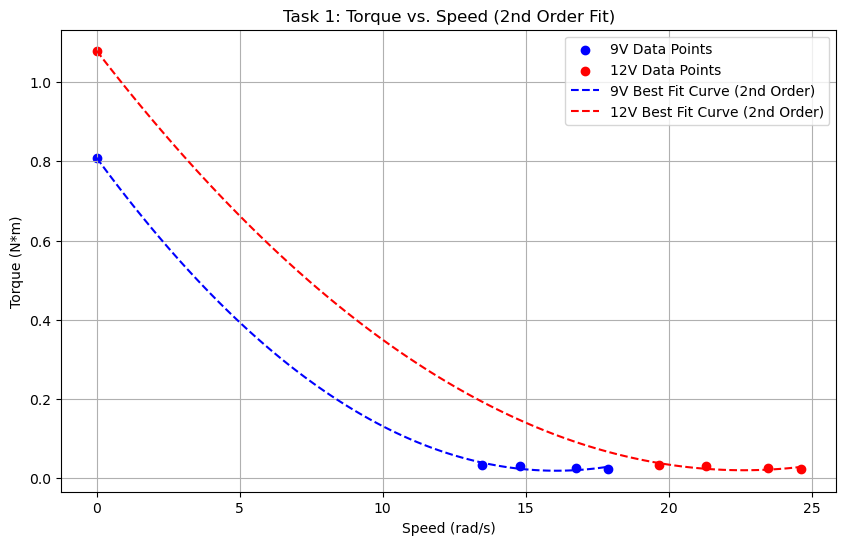

--- 任务 2: 功率 vs. 速度 拟合方程 ---
9V 拟合方程: Power = -0.0019 * Speed^2 + 0.0587 * Speed + -0.0000
12V 拟合方程: Power = -0.0017 * Speed^2 + 0.0670 * Speed + 0.0000
----------------------------------------


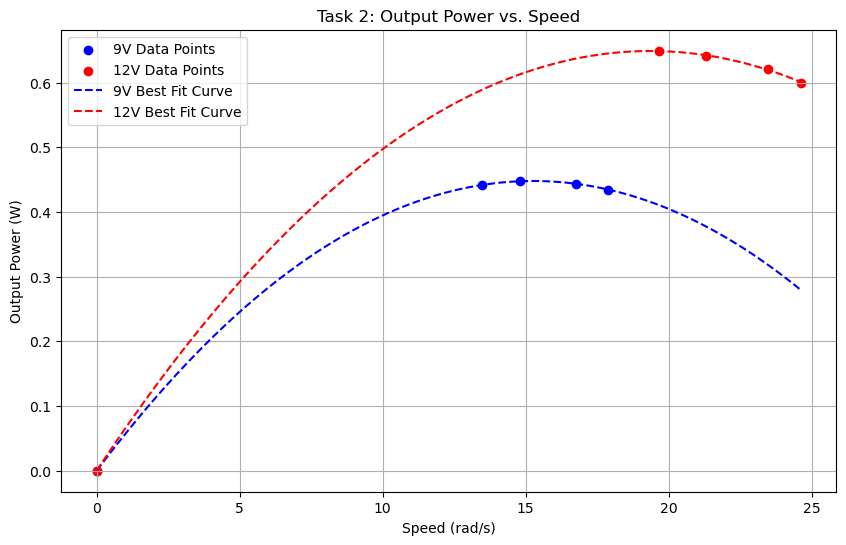

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 存储数据 ---
# 根据 Table 2 (Voltage = 9V)
T_9v = np.array([0.024, 0.026, 0.030, 0.033, 0.809])  # Torque (N*m)
w_9v = np.array([17.883, 16.745, 14.793, 13.488, 0])    # Speed (rad/s)
P_9v = np.array([0.4344, 0.4439, 0.4473, 0.4418, 0])   # Output Power (W)

# 根据 Table 3 (Voltage = 12V)
T_12v = np.array([0.024, 0.026, 0.030, 0.033, 1.079]) # Torque (N*m)
w_12v = np.array([24.628, 23.482, 21.286, 19.649, 0])   # Speed (rad/s)
P_12v = np.array([0.5999, 0.6209, 0.6409, 0.6492, 0])  # Output Power (W)

print("--- 任务 1: 扭矩 vs. 速度 (2阶拟合) ---")

# 按照要求，使用2阶多项式拟合
# T = a*w^2 + b*w + c
coeffs_T_9v = np.polyfit(w_9v, T_9v, 2)
a_T_9v, b_T_9v, c_T_9v = coeffs_T_9v
T_fit_9v = np.poly1d(coeffs_T_9v)

coeffs_T_12v = np.polyfit(w_12v, T_12v, 2)
a_T_12v, b_T_12v, c_T_12v = coeffs_T_12v
T_fit_12v = np.poly1d(coeffs_T_12v)

# 准备绘图的拟合曲线数据
# 创建一个平滑的x轴（速度）范围用于绘制曲线
w_fit_line_9v = np.linspace(min(w_9v), max(w_9v), 100)
T_fit_line_9v = T_fit_9v(w_fit_line_9v)

w_fit_line_12v = np.linspace(min(w_12v), max(w_12v), 100)
T_fit_line_12v = T_fit_12v(w_fit_line_12v)

# --- 3. 打印拟合方程 ---
print("拟合方程 (Torque = a*Speed^2 + b*Speed + c):")
print(f"9V 拟合方程: Torque = {a_T_9v:.5f} * Speed^2 + ({b_T_9v:.5f}) * Speed + ({c_T_9v:.5f})")
print(f"12V 拟合方程: Torque = {a_T_12v:.5f} * Speed^2 + ({b_T_12v:.5f}) * Speed + ({c_T_12v:.5f})")
print("-" * 40)

# --- 4. 绘制图表 1 ---
plt.figure(figsize=(10, 6))
# 绘制数据点
plt.scatter(w_9v, T_9v, label='9V Data Points', color='blue')
plt.scatter(w_12v, T_12v, label='12V Data Points', color='red')
# 绘制2阶拟合曲线
plt.plot(w_fit_line_9v, T_fit_line_9v, label='9V Best Fit Curve (2nd Order)', linestyle='--', color='blue')
plt.plot(w_fit_line_12v, T_fit_line_12v, label='12V Best Fit Curve (2nd Order)', linestyle='--', color='red')

plt.title('Task 1: Torque vs. Speed (2nd Order Fit)')
plt.xlabel('Speed (rad/s)')
plt.ylabel('Torque (N*m)')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. 任务 2: 输出功率 vs. 速度 (Output Power vs. Speed) ---

# 执行二次拟合 (2次多项式)
# P = a*w^2 + b*w + c
coeffs_P_9v = np.polyfit(w_9v, P_9v, 2)
a_P_9v, b_P_9v, c_P_9v = coeffs_P_9v
P_fit_9v = np.poly1d(coeffs_P_9v)

coeffs_P_12v = np.polyfit(w_12v, P_12v, 2)
a_P_12v, b_P_12v, c_P_12v = coeffs_P_12v
P_fit_12v = np.poly1d(coeffs_P_12v)

# 准备绘图的拟合曲线数据
# w_fit_line 已经从上一步生成 (0 到 max(w_12v))
P_fit_line_9v = P_fit_9v(w_fit_line)
P_fit_line_12v = P_fit_12v(w_fit_line)

print("--- 任务 2: 功率 vs. 速度 拟合方程 ---")
print(f"9V 拟合方程: Power = {a_P_9v:.4f} * Speed^2 + {b_P_9v:.4f} * Speed + {c_P_9v:.4f}")
print(f"12V 拟合方程: Power = {a_P_12v:.4f} * Speed^2 + {b_P_12v:.4f} * Speed + {c_P_12v:.4f}")
print("-" * 40)

# 绘制图表 2
plt.figure(figsize=(10, 6))
plt.scatter(w_9v, P_9v, label='9V Data Points', color='blue')
plt.scatter(w_12v, P_12v, label='12V Data Points', color='red')
plt.plot(w_fit_line, P_fit_line_9v, label='9V Best Fit Curve', linestyle='--', color='blue')
plt.plot(w_fit_line, P_fit_line_12v, label='12V Best Fit Curve', linestyle='--', color='red')

plt.title('Task 2: Output Power vs. Speed')
plt.xlabel('Speed (rad/s)')
plt.ylabel('Output Power (W)')
plt.legend()
plt.grid(True)
plt.show()